# Лабораторна робота 3
## Наближене обчислення площі фігури методом Монте-Карло

### Варіант 2
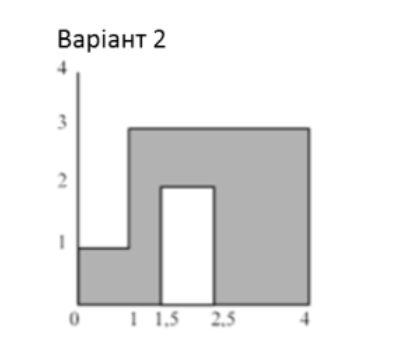

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Геометричне задання фігури

In [3]:
def top_y(x):

    if x <= 1:
        return 1
    elif x <= 4:
        return 3
    else:
        return 0

def is_inside(x, y):
   
    if x < 0 or x > 4 or y < 0 or y > top_y(x):
        return False

    if 1.5 <= x <= 2.5 and 1 <= y <= 2:
        return False
    return True

### 2. Функція для методу Монте-Карло

In [4]:
def monte_carlo_area(N=10000):

    xs = np.random.uniform(0, 4, N)
    ys = np.random.uniform(0, 3, N)
  
    mask = np.array([is_inside(x, y) for x, y in zip(xs, ys)])
    inside = mask.sum()
    box_area = 4 * 3
    area_est = box_area * inside / N
    return area_est, mask, xs, ys

### 3. Основна програма

In [5]:
true_area = 9.0  
for N in [1000, 5000, 20000, 100000]:
    est, mask, xs, ys = monte_carlo_area(N)
    se = np.sqrt(est * (12 - est) / N)   
    print(f"N={N:7d}  estimated area = {est:.5f},  se = {se:.5f},  error = {est - true_area:+.5f}")


N=   1000  estimated area = 8.78400,  se = 0.16808,  error = -0.21600
N=   5000  estimated area = 8.97840,  se = 0.07366,  error = -0.02160
N=  20000  estimated area = 9.02880,  se = 0.03662,  error = +0.02880
N= 100000  estimated area = 9.00324,  se = 0.01643,  error = +0.00324


### 4. Візуалізація

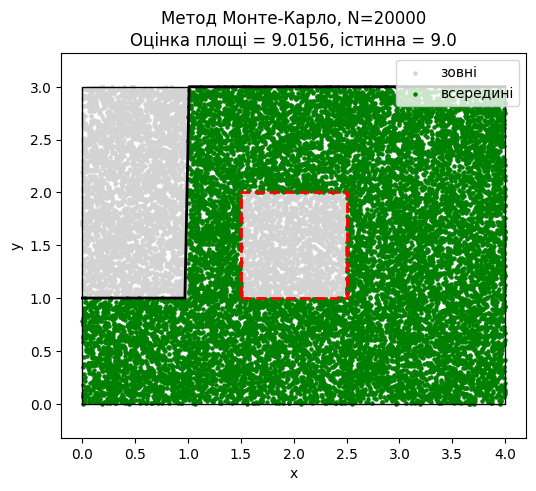

In [6]:
N = 20000
est, mask, xs, ys = monte_carlo_area(N)

plt.figure(figsize=(6, 5))
plt.scatter(xs[~mask], ys[~mask], s=5, color='lightgray', label='зовні')
plt.scatter(xs[mask], ys[mask], s=5, color='green', label='всередині')

x_vals = np.linspace(0, 4, 100)
y_top = [top_y(x) for x in x_vals]
plt.plot(x_vals, y_top, 'k', lw=2)
plt.plot([0, 4, 4, 0, 0], [0, 0, 3, 3, 0], 'k', lw=1)  

plt.plot([1.5, 2.5, 2.5, 1.5, 1.5], [1, 1, 2, 2, 1], 'r--', lw=2)

plt.title(f"Метод Монте-Карло, N={N}\nОцінка площі = {est:.4f}, істинна = {true_area}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis("equal")
plt.show()
